In [3]:
import torch
from train.model import MNISTNeuralNet
import mlflow
from torchinfo import summary
from train.hyperparams import params

In [4]:

trackinguri = "http://127.0.0.1:5000/"

mlflow.set_tracking_uri(trackinguri)
client = mlflow.MlflowClient(tracking_uri=trackinguri)


In [7]:
mnist_model = MNISTNeuralNet(hidden_dim=params["hidden_dim"],dropout_prob=params["dropout_prob"])


In [10]:
MLFLOW_EXPERIMENT_NAME = "Digit-Recognition"

In [11]:
experiment = mlflow.get_experiment_by_name(MLFLOW_EXPERIMENT_NAME)
exp_id = experiment.experiment_id if experiment else mlflow.create_experiment(MLFLOW_EXPERIMENT_NAME)
 


In [12]:
exp_id

'315412815950267867'

In [13]:
model_path = 'mlflow-artifacts:/315412815950267867/cbabe04a2e3d40b08ea4bfcefbf4210e/artifacts/model_weights/mnist_model_state_dict.pth'

In [14]:
ml_path = mlflow.artifacts.download_artifacts(model_path,dst_path='/statedict')

In [15]:
ml_path

'd:\\statedict\\mnist_model_state_dict.pth'

In [16]:
state_dict = torch.load(ml_path)
mnist_model.load_state_dict(state_dict)
mnist_model.eval()

MNISTNeuralNet(
  (conv): Sequential(
    (0): Conv2d(1, 8, kernel_size=(5, 5), stride=(1, 1))
    (1): Dropout2d(p=0.2, inplace=True)
    (2): LeakyReLU(negative_slope=0.02, inplace=True)
    (3): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(8, 32, kernel_size=(3, 3), stride=(1, 1))
    (6): Dropout2d(p=0.4, inplace=True)
    (7): LeakyReLU(negative_slope=0.02, inplace=True)
    (8): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(32, 64, kernel_size=(2, 2), stride=(1, 1))
    (11): Dropout2d(p=0.2, inplace=True)
    (12): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (linear): Sequential(
    (0): Linear(in_features=1024, out_features=400, bias=True)
    (1): LeakyReLU(negative_slop

In [17]:
from train.DataLoader import train_val_dataloader

In [18]:
from torchvision.utils import make_grid
import matplotlib.pyplot as plt

In [38]:
train_dataloader, val_dataloader = train_val_dataloader(batch_size=32)

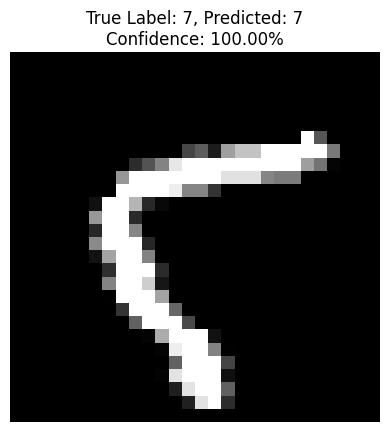

In [61]:
import random

# Get one batch from the validation dataloader
images, labels = next(iter(val_dataloader))

# Select a random index within the batch
random_index = random.randint(0, images.size(0) - 1)

# Extract the random image and its label
image = images[random_index]
true_label = labels[random_index]


# Perform inference
with torch.no_grad():
    output = mnist_model(image.unsqueeze(0))  # Add batch dimension
    predicted_label = torch.argmax(output, dim=1)
    confidence = output[0][predicted_label].item()*100  # Confidence of the predicted label


# Display the image and inference result
plt.imshow(image.squeeze(), cmap="gray")
plt.title(f"True Label: {true_label.item()}, Predicted: {predicted_label.item()}\nConfidence: {confidence:.2f}%")
plt.axis("off")
plt.show()